In [23]:
from ec_on_text import *
from features import *
from ordec import *
from ordec_borders import *
from trajectories import *
from collections import defaultdict
# wdict = np.load('../russian_dict.npy', allow_pickle=True).item()
wdict = np.load('../russian_dict_cbow.npy', allow_pickle=True).item()
jokes = [i for i in open('../anekdots_trunc.txt', 'r', encoding = 'utf-8').read().split('\n\n') if i != ''][0:100]
def split_text_into_chunks(text, chunk_size):
    words = text.split()
    chunks = [' '.join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]
    return chunks

liter = split_text_into_chunks(open('../pure_literature_trunc.txt', 'r', encoding = 'utf-8').read(), 25)[0:len(jokes)]
n_values = [2, 3, 4]
# m_values = [3, 4, 5, 6, 7, 8, 9, 10, 11]
m_values = [3, 4, 5, 6, 7, 8]
trajectories_jokes = {}
trajectories_liter = {}
results_jokes = {}
results_liter = {}

In [24]:
for m in m_values:
    trajectories_jokes[m] = []
    for joke in jokes:
        text = joke.split()
        trajectories_jokes[m].append(trajectory_from_text(text, wdict, m))

for m in m_values:
    trajectories_liter[m] = []
    for lit in liter:
        text = lit.split()
        trajectories_liter[m].append(trajectory_from_text(text, wdict, m))

In [25]:
for n in n_values:
    results_jokes[n] = {}
    for m in m_values:
        results_jokes[n][m] = []
        for trajectory in trajectories_jokes[m]:
            ent_comp = get_entropy_complexity_features(trajectory, n, m)
            results_jokes[n][m].append(ent_comp)

for n in n_values:
    results_liter[n] = {}
    for m in m_values:
        results_liter[n][m] = []
        for trajectory in trajectories_liter[m]:
            ent_comp = get_entropy_complexity_features(trajectory, n, m)
            results_liter[n][m].append(ent_comp)

In [26]:
borders_precomp = {}
for n in n_values:
    for m in m_values:
        borders_precomp[(n, m)] = (get_borders(n, m))

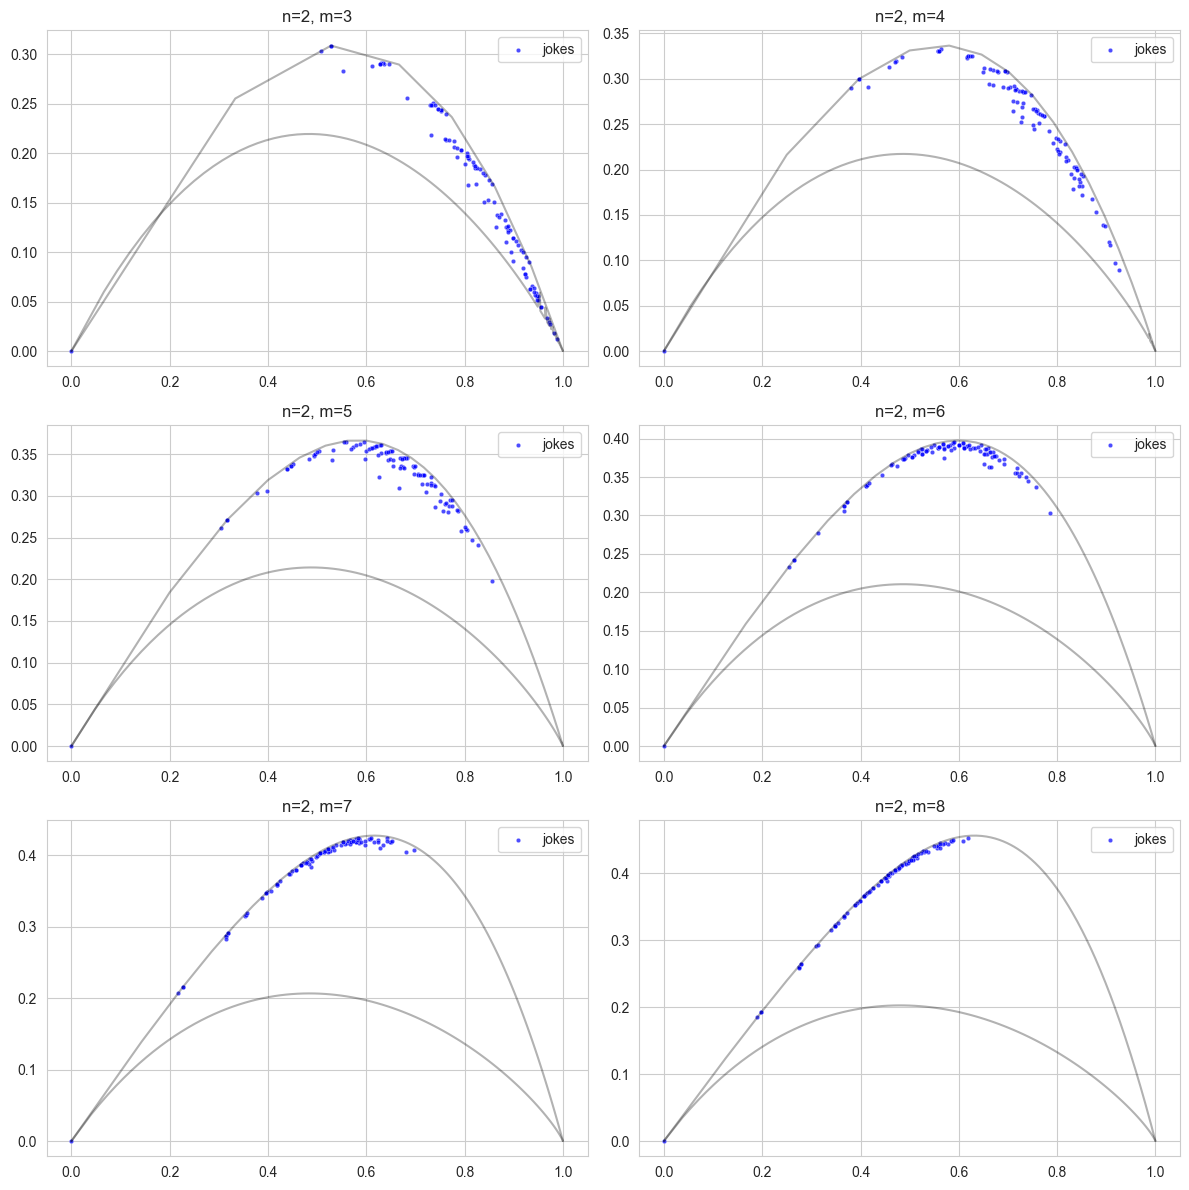

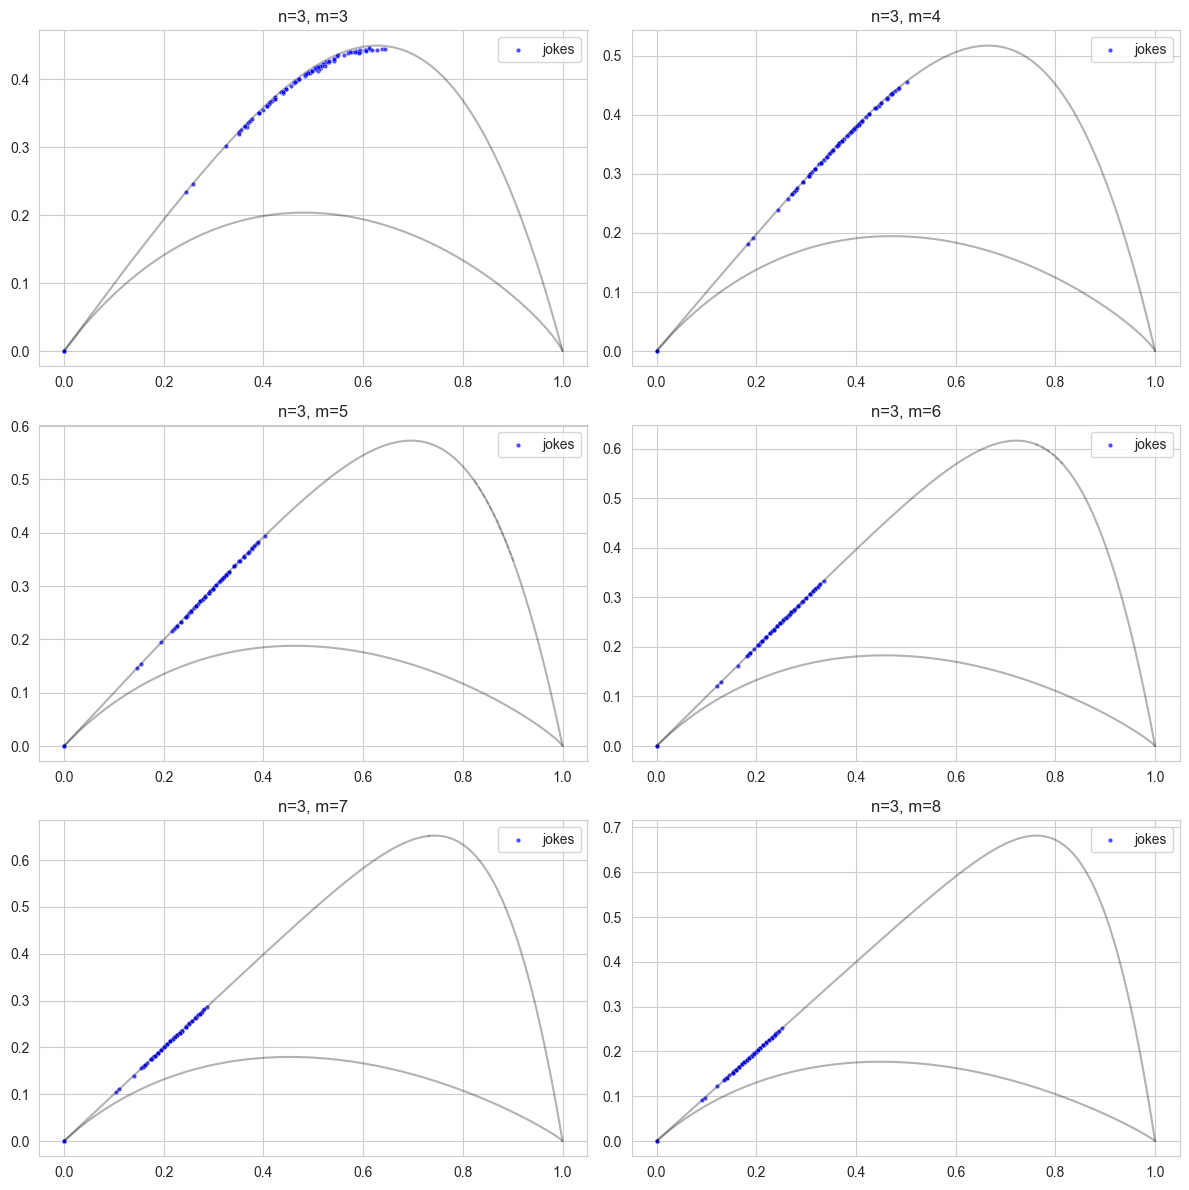

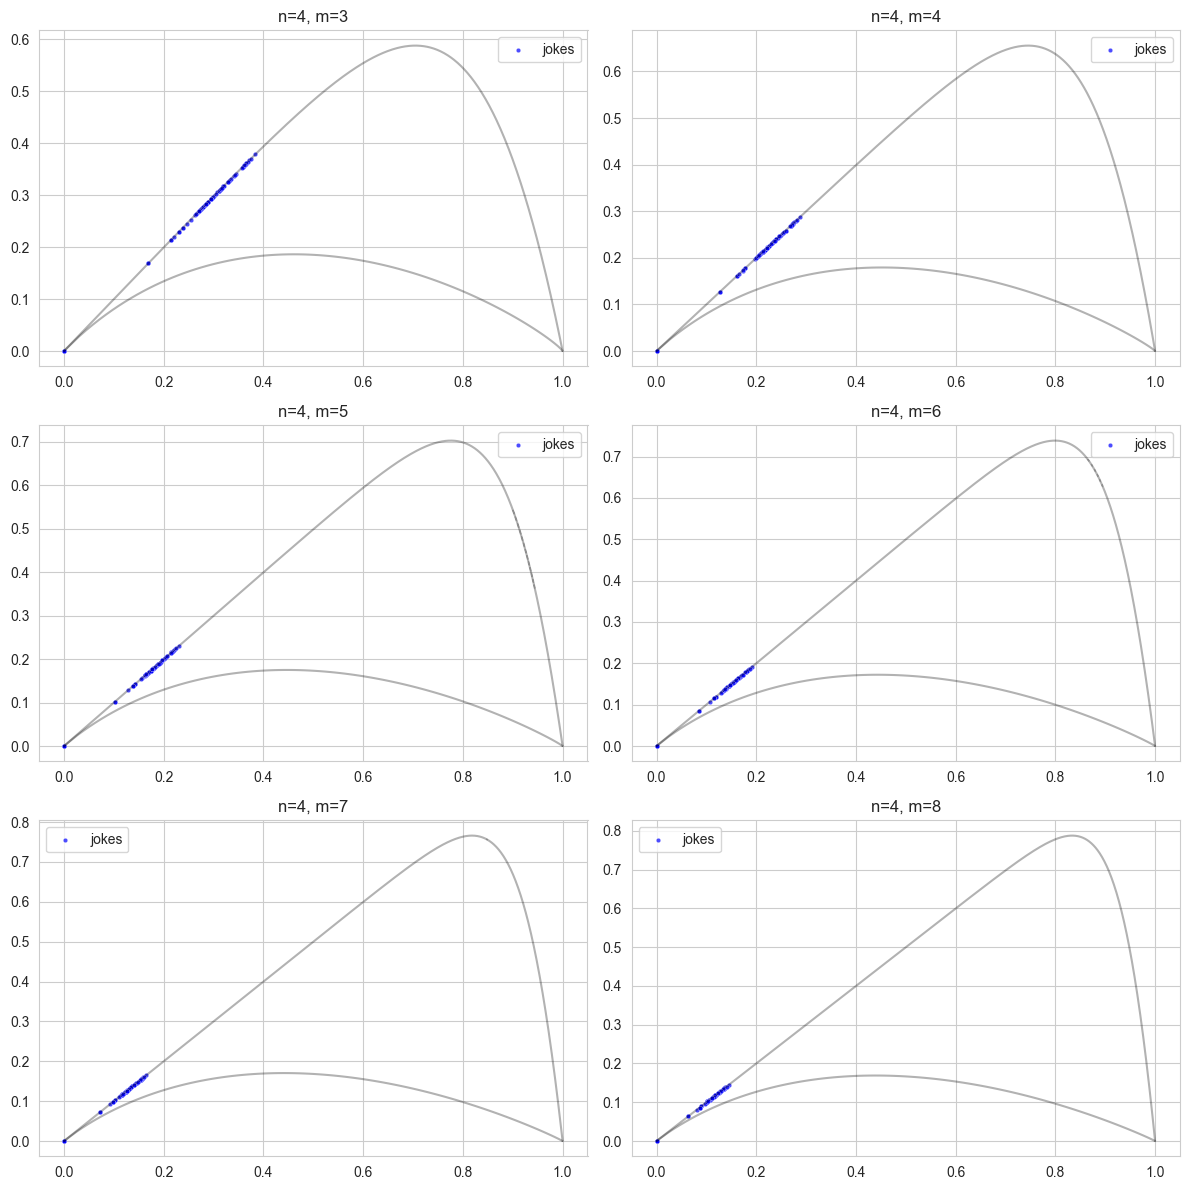

In [28]:
for n in n_values:
    fig, axes = plt.subplots(3, 2, figsize=(12, 12))
    axes = axes.flatten()
    
    for m_idx, m in enumerate(m_values):
        ax = axes[m_idx]

        min_ec, max_ec = borders_precomp[(n, m)]

        entropy_jokes = [x[0] for x in results_jokes[n][m]]
        complexity_jokes = [x[1] for x in results_jokes[n][m]]
        
        entropy_liter = [x[0] for x in results_liter[n][m]]
        complexity_liter = [x[1] for x in results_liter[n][m]]
        
        sns.scatterplot(
            x=entropy_jokes,
            y=complexity_jokes,
            color='blue',
            s=10,
            ax=ax,
            alpha=0.7,
            label='jokes'
        )
        
        sns.scatterplot(
            x=entropy_liter,
            y=complexity_liter,
            color='red',
            s=10,
            ax=ax,
            alpha=0.7,
            label='liter'
        )
        
        sns.lineplot(x=min_ec[:, 0], y=min_ec[:, 1], color='black', ax=ax, alpha=0.3)
        sns.lineplot(x=max_ec[:, 0], y=max_ec[:, 1], color='black', ax=ax, alpha=0.3)
        
        ax.set_title(f"n={n}, m={m}")
        ax.legend()

    plt.tight_layout()
    plt.show()

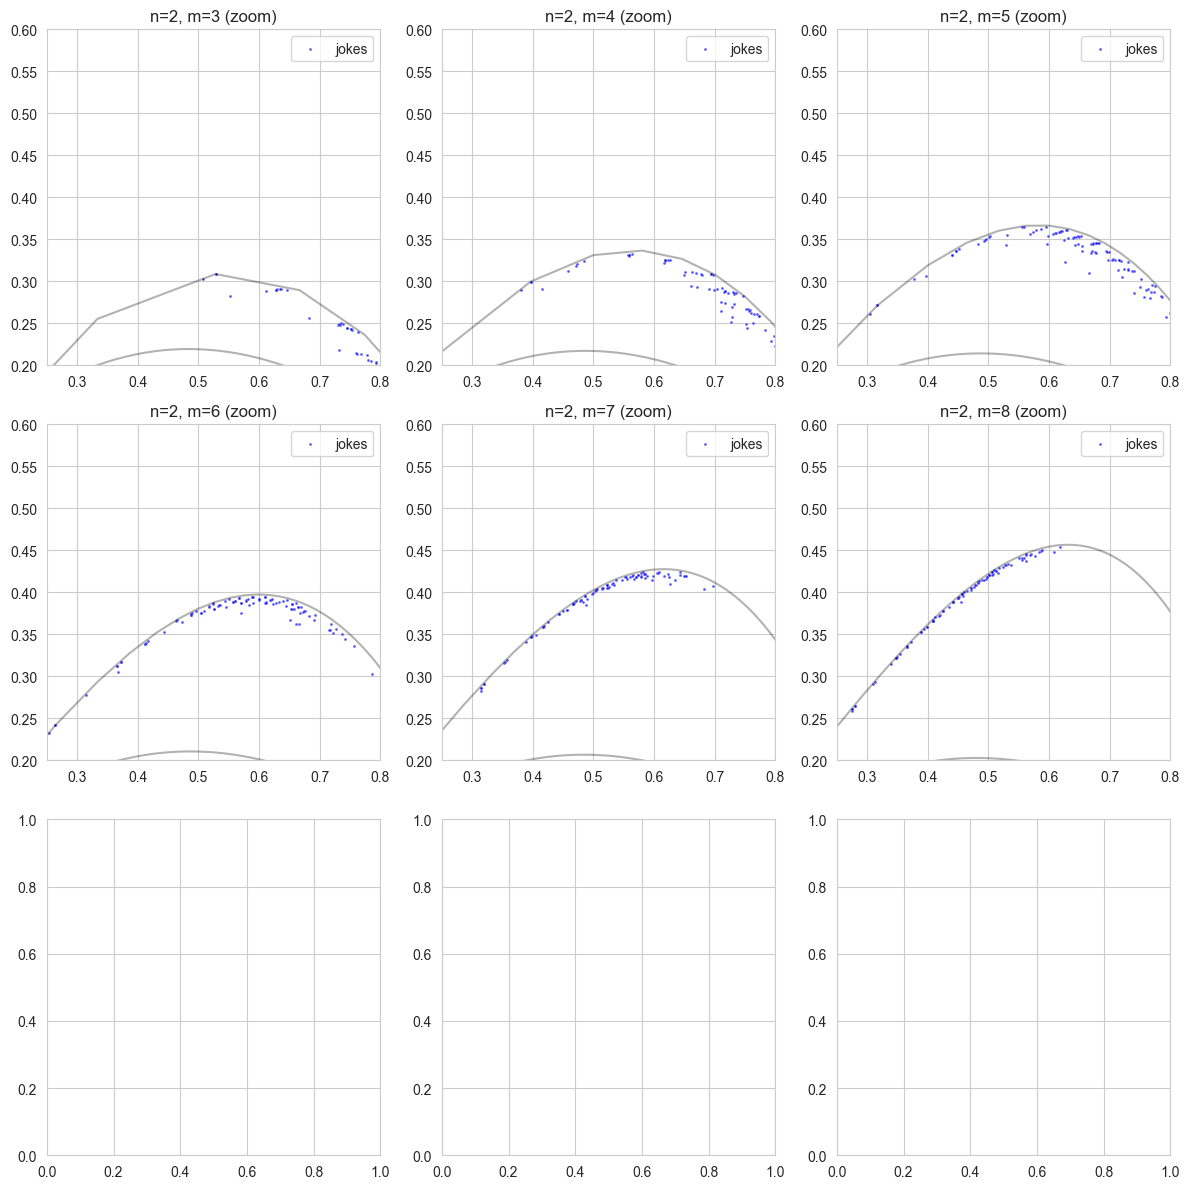

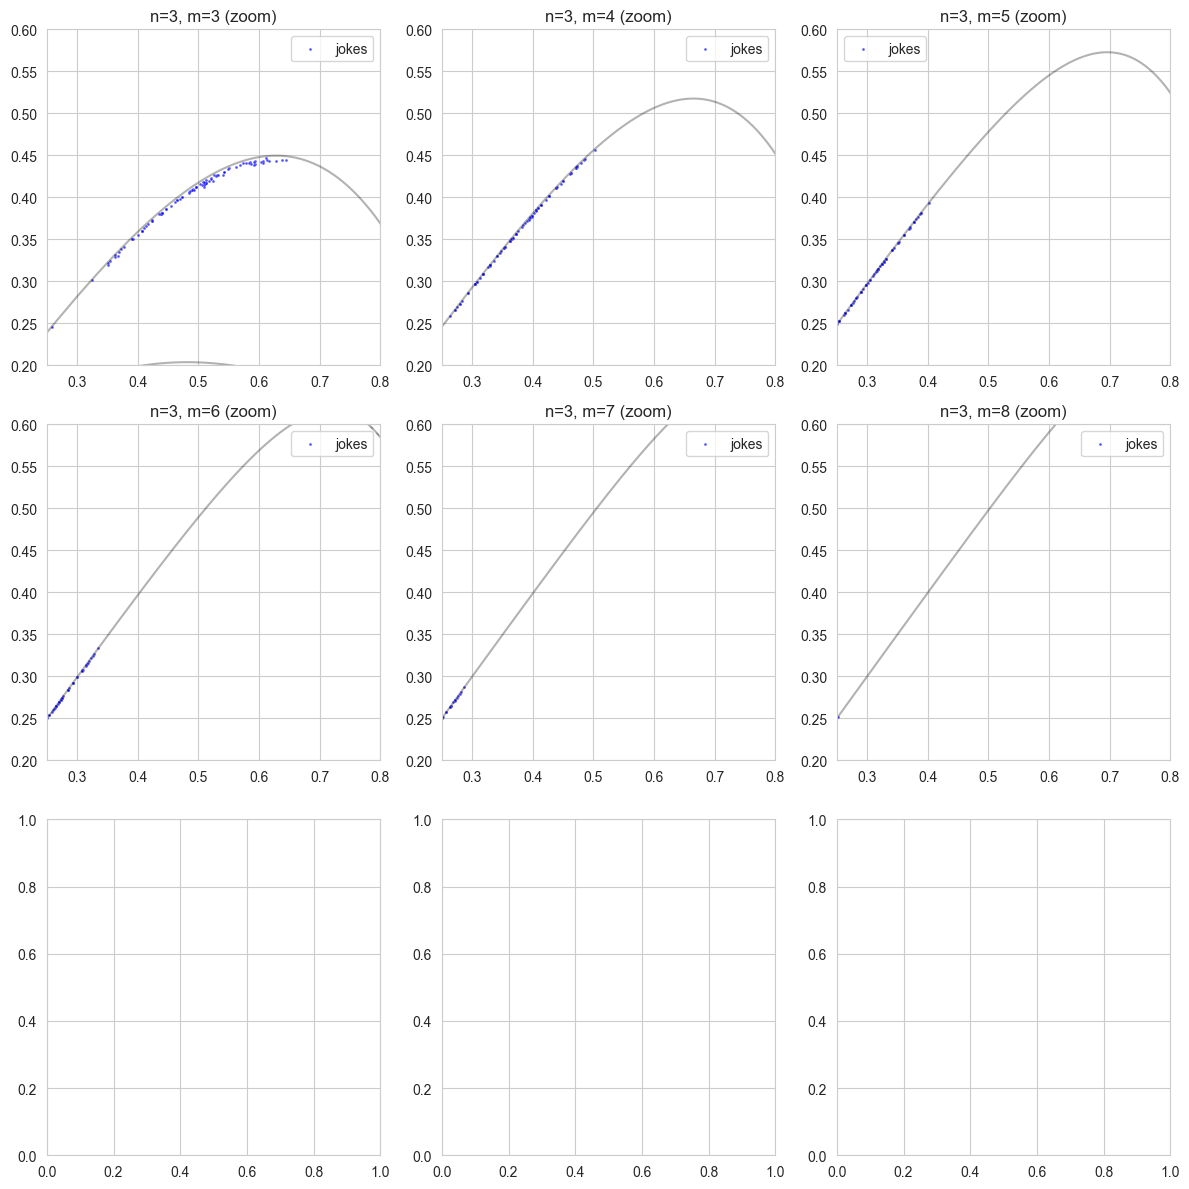

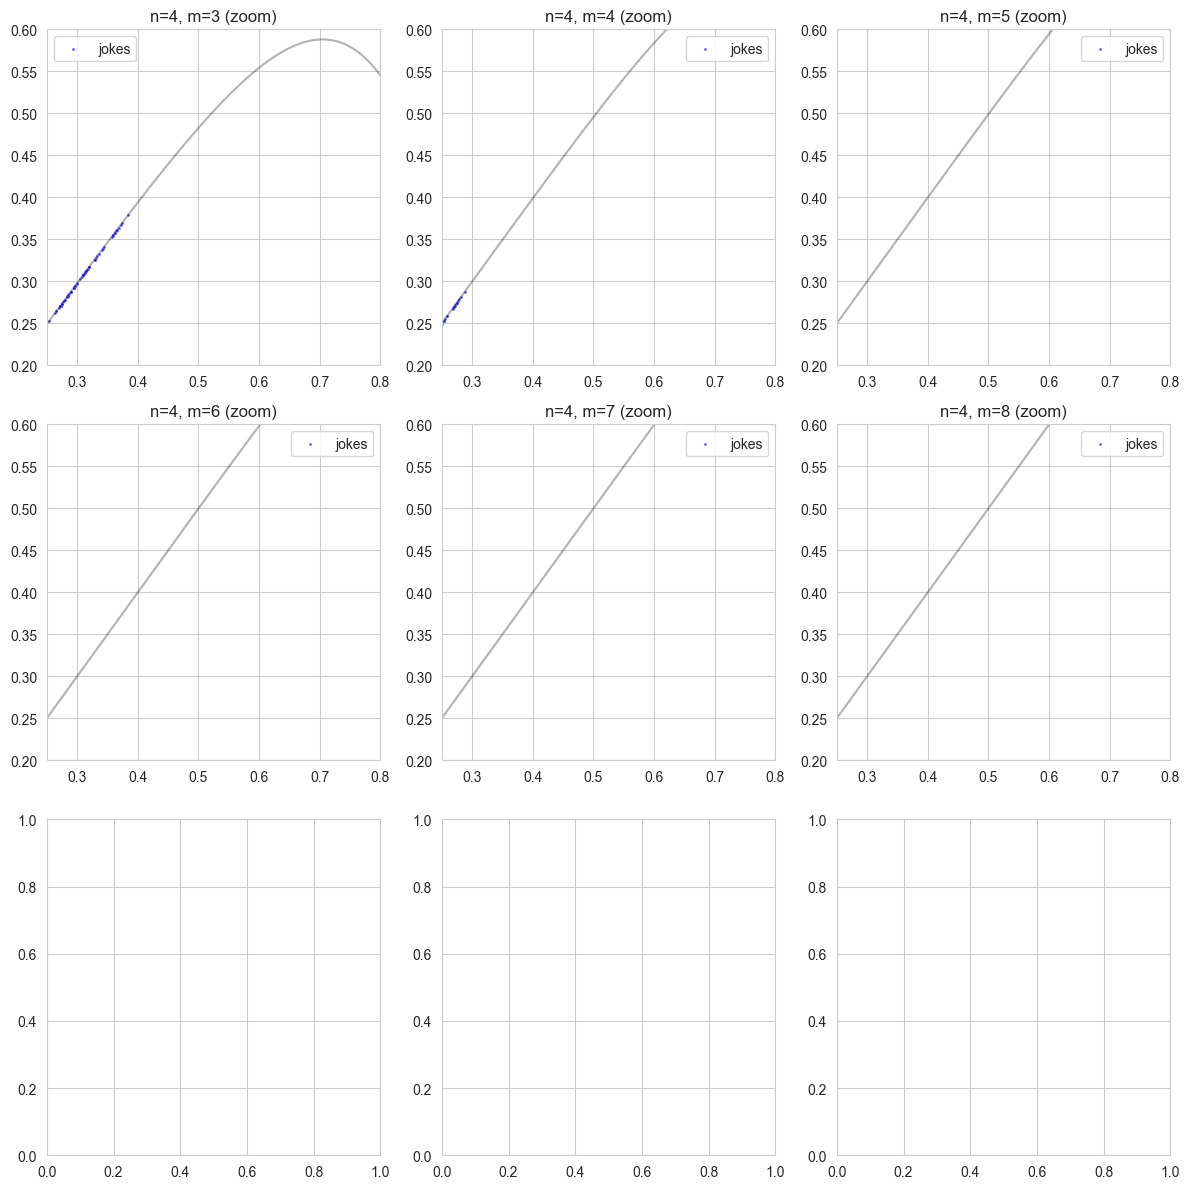

In [29]:
for n in n_values:
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    axes = axes.flatten()
    
    for m_idx, m in enumerate(m_values):
        ax = axes[m_idx]

        min_ec, max_ec = borders_precomp[(n, m)]
        
        entropy_jokes = [x[0] for x in results_jokes[n][m]]
        complexity_jokes = [x[1] for x in results_jokes[n][m]]
        
        entropy_liter = [x[0] for x in results_liter[n][m]]
        complexity_liter = [x[1] for x in results_liter[n][m]]

        zoom_x_min, zoom_x_max = 0.25, 0.8
        zoom_y_min, zoom_y_max = 0.2, 0.6

        sns.scatterplot(
            x=entropy_jokes,
            y=complexity_jokes,
            color='blue',
            s=4,
            ax=ax,
            alpha=0.7,
            label='jokes'
        )
        
#         sns.scatterplot(
#             x=entropy_liter,
#             y=complexity_liter,
#             color='red',
#             s=4,
#             ax=ax,
#             alpha=0.7,
#             label='liter'
#         )
        
        sns.lineplot(x=min_ec[:, 0], y=min_ec[:, 1], color='black', ax=ax, alpha=0.3)
        sns.lineplot(x=max_ec[:, 0], y=max_ec[:, 1], color='black', ax=ax, alpha=0.3)
        
        ax.set_xlim(zoom_x_min, zoom_x_max)
        ax.set_ylim(zoom_y_min, zoom_y_max)
        
        ax.set_title(f"n={n}, m={m} (zoom)")
        ax.legend()

    plt.tight_layout()
    plt.show()

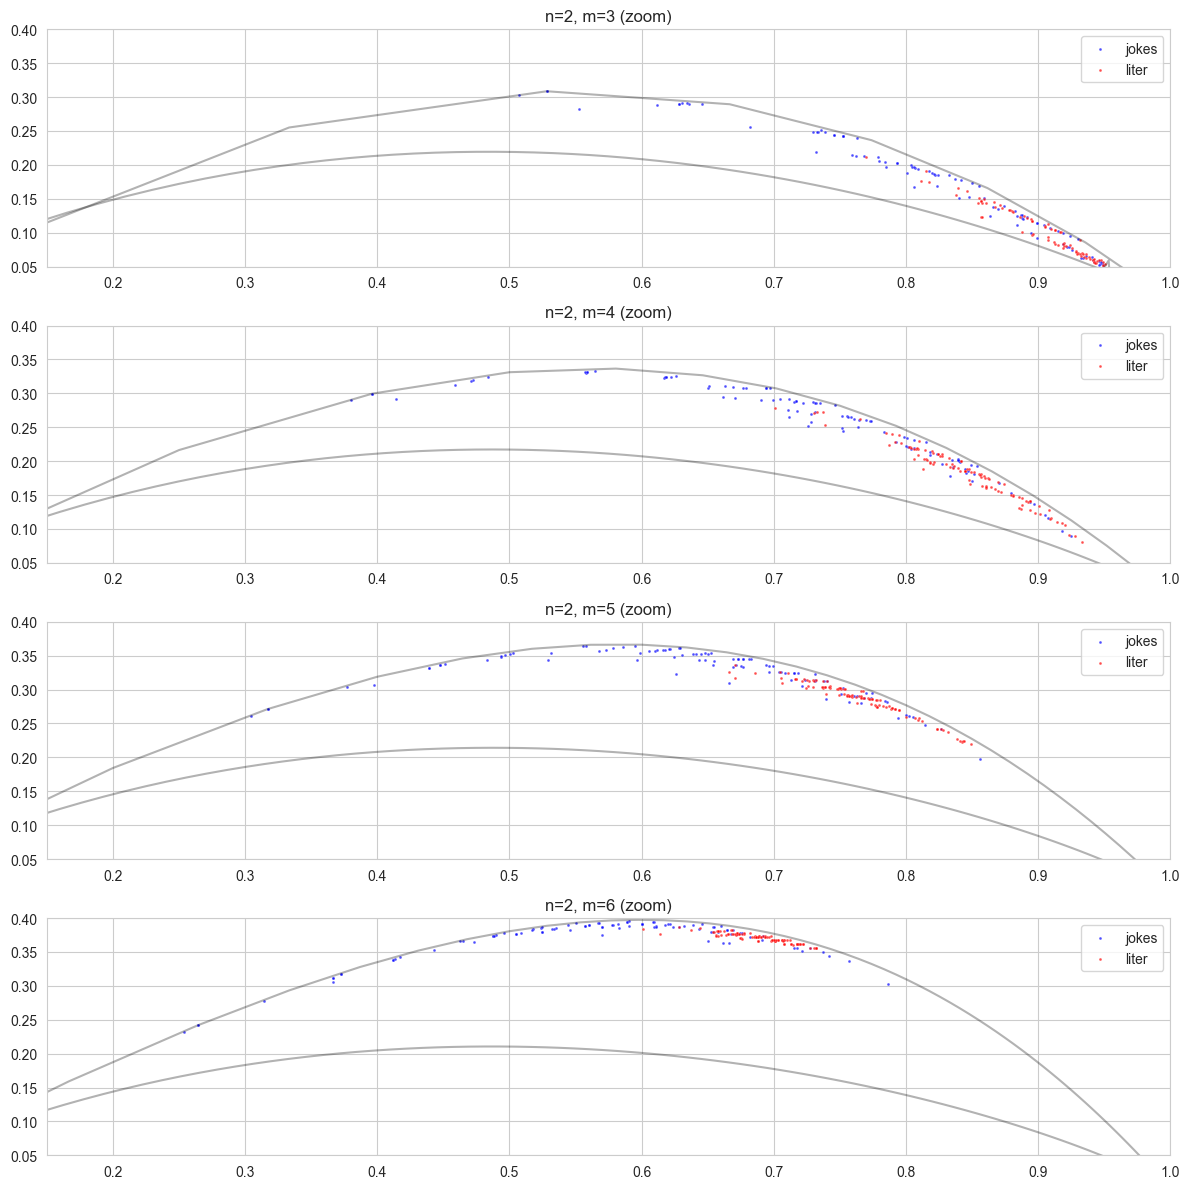

In [32]:
n = 2
fig, axes = plt.subplots(4, figsize=(12, 12))
axes = axes.flatten()

for m_idx, m in enumerate(m_values[0:4]):
    ax = axes[m_idx]

    min_ec, max_ec = borders_precomp[(n, m)]

    entropy_jokes = [x[0] for x in results_jokes[n][m]]
    complexity_jokes = [x[1] for x in results_jokes[n][m]]

    entropy_liter = [x[0] for x in results_liter[n][m]]
    complexity_liter = [x[1] for x in results_liter[n][m]]

    zoom_x_min, zoom_x_max = 0.15, 1.0
    zoom_y_min, zoom_y_max = 0.05, 0.4

    sns.scatterplot(
        x=entropy_jokes,
        y=complexity_jokes,
        color='blue',
        s=4,
        ax=ax,
        alpha=0.7,
        label='jokes'
    )

    sns.scatterplot(
        x=entropy_liter,
        y=complexity_liter,
        color='red',
        s=4,
        ax=ax,
        alpha=0.7,
        label='liter'
    )

    sns.lineplot(x=min_ec[:, 0], y=min_ec[:, 1], color='black', ax=ax, alpha=0.3)
    sns.lineplot(x=max_ec[:, 0], y=max_ec[:, 1], color='black', ax=ax, alpha=0.3)

    ax.set_xlim(zoom_x_min, zoom_x_max)
    ax.set_ylim(zoom_y_min, zoom_y_max)

    ax.set_title(f"n={n}, m={m} (zoom)")
    ax.legend()

plt.tight_layout()
plt.show()

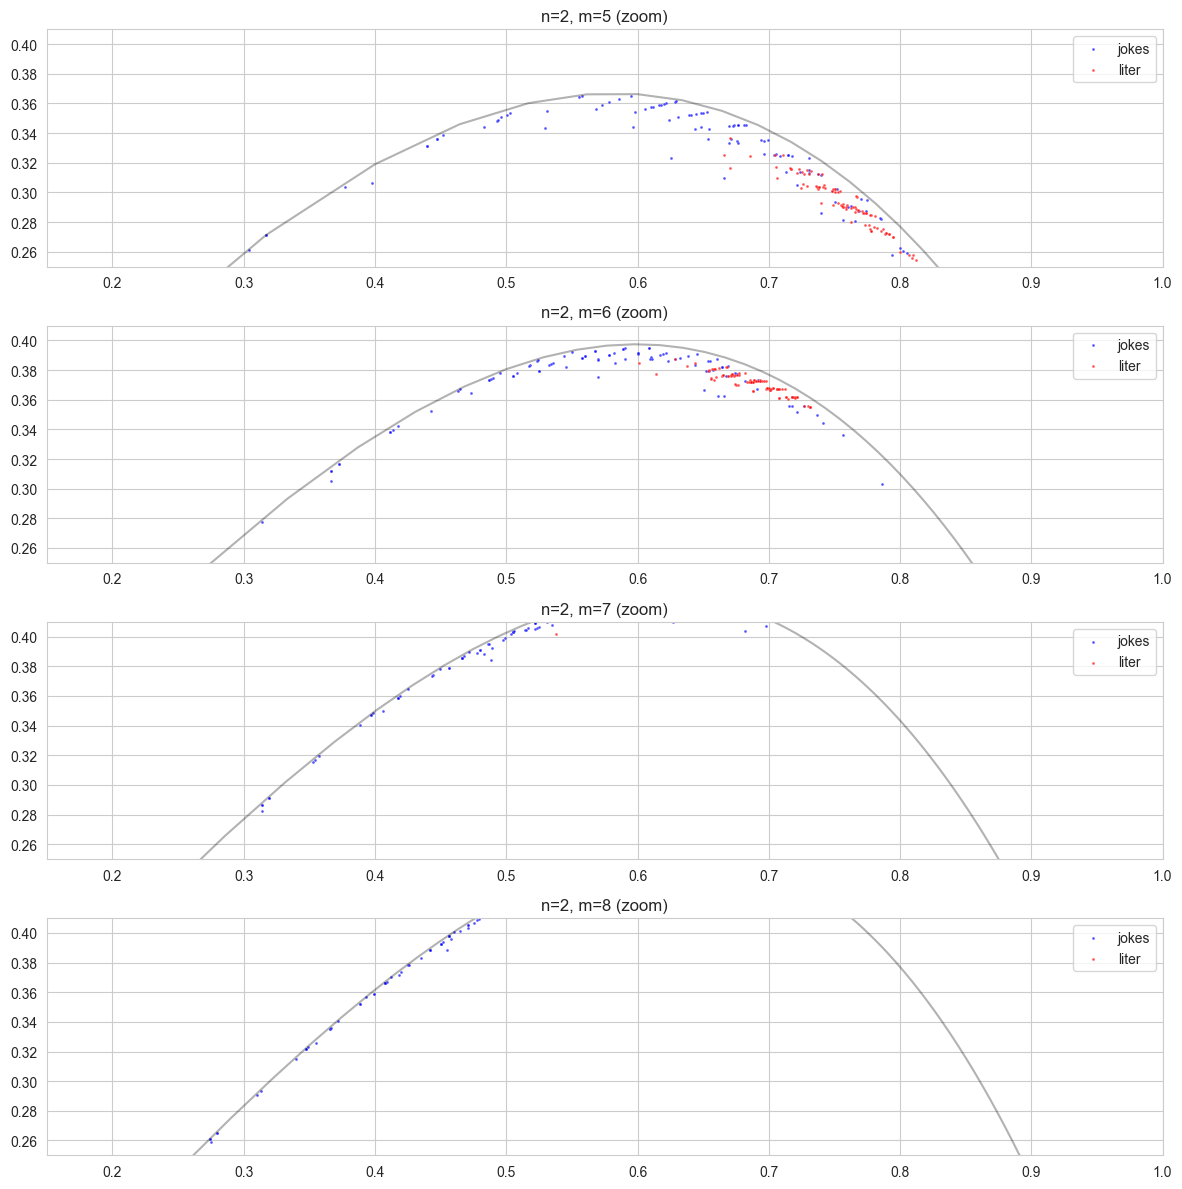

In [31]:
n = 2
fig, axes = plt.subplots(4, figsize=(12, 12))
axes = axes.flatten()

for m_idx, m in enumerate(m_values[2:6]):
    ax = axes[m_idx]

    min_ec, max_ec = borders_precomp[(n, m)]

    entropy_jokes = [x[0] for x in results_jokes[n][m]]
    complexity_jokes = [x[1] for x in results_jokes[n][m]]

    entropy_liter = [x[0] for x in results_liter[n][m]]
    complexity_liter = [x[1] for x in results_liter[n][m]]

    zoom_x_min, zoom_x_max = 0.15, 1.0
    zoom_y_min, zoom_y_max = 0.25, 0.41

    sns.scatterplot(
        x=entropy_jokes,
        y=complexity_jokes,
        color='blue',
        s=4,
        ax=ax,
        alpha=0.7,
        label='jokes'
    )

    sns.scatterplot(
        x=entropy_liter,
        y=complexity_liter,
        color='red',
        s=4,
        ax=ax,
        alpha=0.7,
        label='liter'
    )

    sns.lineplot(x=min_ec[:, 0], y=min_ec[:, 1], color='black', ax=ax, alpha=0.3)
    sns.lineplot(x=max_ec[:, 0], y=max_ec[:, 1], color='black', ax=ax, alpha=0.3)

    ax.set_xlim(zoom_x_min, zoom_x_max)
    ax.set_ylim(zoom_y_min, zoom_y_max)

    ax.set_title(f"n={n}, m={m} (zoom)")
    ax.legend()

plt.tight_layout()
plt.show()